<a href="https://colab.research.google.com/github/johnrso/MLin30Minutes/blob/main/ML_in_30_Minutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML in 30 Minutes: Integrating and Fine-tuning Models for your Projects
This notebook will walk you through the process of sourcing a dataset for your project, choosing a model architecture, and fine-tuning it for a specific application.

Run the cell below (using Shift + Enter or with the "play button") to install the required dependencies.

In [34]:
# install dependencies
!pip install torch
!pip install torchvision
!pip install wandb
!pip install numpy
!pip install matplotlib

# Some Mathematical Background behind Machine Learning
Machine learning focuses on the problem of learning from data.

# The Task
In this tutorial, we are going to create a model that can classify types of trash in a scene. We want to give the model an image as input, and have it output a learned classification for the object. 

This is one common problem in the field of **Computer Vision**, which focuses on learning from images.

# Sourcing a Dataset
The corner stone of any ML model is the data on which it is trained; a model can only be as good as its data.

We can source data through a variety of online resources. [torchvision](https://pytorch.org/vision/stable/datasets.html) and [torchaudio](https://pytorch.org/audio/stable/datasets.html) contain several datasets that are compatible with PyTorch dataloading tools. Kaggle and other sites are also great resources for sourcing datasets. 

For this tutorial, we'll see how to load common datasets from torchvision. 

We will also likely want to find a dataset that is reflective of our task; for this, we will be using a trash dataset from Kaggle. Download it here: https://www.kaggle.com/asdasdasasdas/garbage-classification

Run the code below to download CIFAR-10 from pytorch, a common benchmark for CV tasks.

Files already downloaded and verified
shape of data: torch.Size([3, 32, 32])


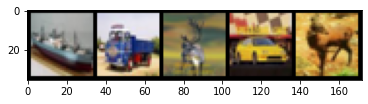

 ship truck  deer   car  deer


In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

batch_size = 5

# download the CIFAR-10 dataset from torchvision
CIFAR_trainset = torchvision.datasets.CIFAR10(root='./data', 
                                              train=True,
                                              download=True, 
                                              transform=transforms.ToTensor())

# loading the data to make it compatible with PyTorch
CIFAR_trainloader = torch.utils.data.DataLoader(CIFAR_trainset, 
                                                batch_size=batch_size,
                                                shuffle=True, 
                                                num_workers=2)

CIFAR_classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
CIFAR_dataiter = iter(CIFAR_trainloader)
images, labels = CIFAR_dataiter.next()

print("shape of data: {}".format(images[0].shape))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % CIFAR_classes[labels[j]] for j in range(batch_size)))


To load the garbage dataset:


1.   Download the dataset from Kaggle.
2.   Extract the dataset from the archive and rename it 'garbage'.
3.   Upload the dataset to your Google Drive using the side taskbar. Make sure it is stored in './drive/MyDrive/
4.   Run the code block below to mount your Drive to Colab.



In [22]:
from google.colab import drive
drive.mount('/content/drive')

Run the code block below to import the data into the notebook (see [ImageFolder Dataset](https://pytorch.org/vision/stable/datasets.html#imagefolder) for more information).

# Choosing a Model
For computer vision models, a popular architecture is a Convolutional Neural Network (CNN). A CNN contains layers that act as sliding filters 

In [24]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Alternatively, we can choose to use a pretrained model to offload computation and save time. 

In [26]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Training and Fine-tuning
Note that the pre-trained ResNet model is not compatible with our current classification problem. 

In [55]:
print(resnet18.fc)

Linear(in_features=512, out_features=1000, bias=True)


For the trash dataset, we expect 6 outputs corresponding to the probability of each classs for the given input. We can fix this by replacing the "head" of the model with a head more suited to our task, and training only the new head (the last layer).

In [58]:
# freezing parameters
for param in resnet18.parameters():
    param.requires_grad = False

resnet18.fc = nn.Linear(in_features=512, out_features=6)

print(resnet18.fc)

Linear(in_features=512, out_features=6, bias=True)


Now, we begin training our modified ResNet model. For classification problems, it is common to 